In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textstat.textstat import textstat
from nltk import word_tokenize, pos_tag
import seaborn as sns
from collections import Counter
import copy
import random

In [9]:
statsData = pd.read_csv("/Users/laura/Google Drive/mdst/mdst-getstarted/ums/data/ums_viz.csv")

#because my version of pandas is different than the version that descriptions.pkl was created with
with open("descriptions.txt") as desc:
    descriptions = desc.readlines()
titles = []
descs = []
tempDesc = ''
for description in descriptions:
    if description[0].isnumeric():
        titles.append(description[4:-1])
    elif description == '\n':
        descs.append(tempDesc)
        tempDesc = ''
    else:
        tempDesc += description[:-1]
descs.append(tempDesc)
titles = titles[:-1]
descs = descs[:-1]

full_titles = pd.read_csv("full_performance_names.csv",header=None)
full_titles = np.ravel(full_titles[[1]])
full_titles = full_titles[:-1]

In [10]:
topics = np.ravel(pd.read_pickle('categories.pkl'))[:-1]

In [11]:
numHits = [480000,425000,1070000,572000,2370000,12400000,88300,123000,36500000,399000,509000,600000,12700000,294000,
           460000,406000,373000,193000,450000,338000,418000,434000,415000,531000,91600,509000,191000,9480,348000,
           12700,5220,3420000,394000,516000,16300,421000,85800,391000000,1500000,12200000,1500000,358000,54400,163000,
           10700000,9980000,80800,6720000,309000,1730000,63300,466000,399000,298000,47300,23100,9210,409000,196000,
           2080000,61700,784000,528000,570000,427000,716000,890000,6280000,3290000,3030000,395000,36000,466000,470000,
           348000,427000,372000,21900,368000,352000,517000,486000,182000,19800000,12200,69500,14900000,17400,540000,
           10600000,55900,1120000,425000,32900000,17300000,412000,547000,8380000,2120000,36200,494000,547000,306000,
           1280000,18000000,350000,732000,406000,12300000,568000,23200000,212000,10200,74900,1710,305000,537000,11200,
           381000,14600000,449000,166000,132000,20800000,116000,2540000,47500000,323000000,3080000,601000,11830000000,
           175000000,7690000,444000,22200,590000,20200000,496000,120000000,211000,10200000,8680,421000]

In [12]:
read = []
formality = []
counts = []
for i in range(len(descs)):
    read.append(textstat.text_standard(descs[i])) #readability consensus
    
    #Heylighen & Dewaele:
    #F = (noun frequency + adjective freq. + preposition freq.+
    #article freq. − pronoun freq. − verb freq. − adverb freq. −
    #interjection freq. + 100)/2
    tokenizedText = word_tokenize(descs[i])
    counts.append(len(tokenizedText))
    posTags = pos_tag(tokenizedText)
    nounFreq=0
    adjFreq=0
    prepFreq=0
    artFreq=0
    proFreq=0
    verbFreq=0
    advFreq=0
    interFreq=0
    #mostly using mapping from https://github.com/slavpetrov/universal-pos-tags/blob/master/en-ptb.map
    for (word, tag) in posTags:
        if tag=="UH":
            interFreq += 1
        if tag=="DT" or tag=="EX" or tag=="PDT" or tag=="WDT":
            artFreq += 1
        if tag=="IN":
            prepFreq += 1
        if tag=="JJ" or tag=="JJR" or tag=="JJS":
            adjFreq += 1
        if tag=="MD" or tag=="VB" or tag=="VBD" or tag=="VBG" or tag=="VBN" or tag=="VBP" or tag=="VBZ" or tag=="VP":
            verbFreq += 1
        if tag=="NN" or tag=="NNP" or tag=="NNPS" or tag=="NNS" or tag=="NP":
            nounFreq += 1
        if tag=="PRP" or tag=="WP":
            proFreq += 1
        if tag=="RB" or tag=="RBR" or tag=="RBS" or tag=="WRB":
            advFreq += 1
    formality.append((nounFreq + adjFreq + prepFreq + artFreq - proFreq - verbFreq - advFreq - interFreq + 100)/2.0)
read = [int(i[:i.find(' ')][:-2]) for i in read]

In [13]:
descriptions = pd.DataFrame(columns=["perf_name","description","full_name","topic"])
descriptions['perf_name'] = titles
descriptions['description'] = descs
descriptions['full_name'] = full_titles
descriptions['topic'] = topics
descriptions['readability'] = read
descriptions['formality'] = formality
descriptions['googleHits'] = numHits
descriptions['tokenCount'] = counts

In [14]:
newDescs = descriptions.drop(['perf_name','description','full_name'],axis=1)
newDescs = newDescs.groupby('topic').aggregate(np.mean)
newDescs

,readability,formality,googleHits,tokenCount
topic,,,,
Chamber,11.366667,79.583333,1.261760e+06,122.200000
Choral,12.666667,94.200000,2.214025e+06,177.866667
Dance,10.769231,99.846154,2.637637e+06,198.846154
Jazz,12.545455,106.454545,4.524265e+06,209.181818
Orchestra,11.333333,89.766667,4.655541e+06,148.466667
Other,11.066667,92.433333,5.691797e+06,184.466667
Theater,10.241379,88.413793,4.445305e+08,156.172414


In [109]:
print(formality.index(min(formality)))
print(descs[79])
print(titles[79])
print(formality[79])

79
“An absolute triumph. Their playing has everything you could possibly wish for.” (BBC Music Magazine) Returning for their fifth UMS concert, the Jerusalem Quartet started some 20 years ago when its members were teenagers, and their confident energy and exquisite sensitivity have kept audiences on the edges of their seats since their UMS debut in 2005.
Jerusalem String Qua
61.0


In [123]:
descs[40]

'“The most beautiful thing we can experience is the mysterious.” — Albert EinsteinWidely credited as one of the greatest artistic achievements of the 20th  century, this rarely performed and revolutionary work launched director  Robert Wilson and composer Philip Glass to international success when  it was first produced in Avignon, France in 1976 with subsequent  performances in Europe and at the Metropolitan Opera. It is still  recognized as one of their greatest masterpieces. Now, nearly four  decades after it was first performed and 20 years since its last  production, Einstein on the Beach will be reconstructed for a major international tour including the first North American presentations ever held outside of New York City.Einstein on the Beach breaks all of the rules of conventional  opera. Instead of a traditional orchestral arrangement, Glass composed  for the synthesizers, woodwinds, and voices of the Philip Glass  Ensemble. Non-narrative in form, the work uses a series of pow

In [68]:
print(read)
print(read.index(min(read)))
print(descs[25])
print(titles[25])

print(textstat.text_standard(descs[25]))

[10, 10, 12, 15, 10, 13, 8, 9, 11, 8, 11, 9, 13, 9, 11, 10, 13, 10, 14, 17, 10, 11, 11, 11, 9, 6, 14, 11, 11, 11, 10, 12, 10, 14, 9, 10, 16, 11, 9, 11, 14, 13, 10, 11, 9, 10, 13, 14, 11, 13, 11, 14, 11, 11, 8, 14, 13, 14, 13, 10, 9, 12, 12, 14, 11, 10, 11, 19, 10, 10, 12, 10, 10, 8, 10, 11, 10, 10, 15, 9, 9, 10, 11, 9, 9, 9, 11, 9, 14, 13, 11, 14, 9, 8, 14, 14, 9, 11, 13, 10, 11, 9, 14, 12, 13, 13, 9, 14, 10, 14, 13, 11, 15, 11, 10, 9, 10, 10, 9, 13, 11, 24, 11, 12, 13, 12, 12, 10, 10, 10, 8, 9, 9, 9, 13, 10, 10, 11, 11, 18, 9, 8, 11]
25
Olga Kern was the 2001 Van Cliburn winner and will perform a program of Schumann, Chopin, and Rachmaninoff. We are delighted to be able to bring Ms. Kern to Ann Arbor. Ms Kern is giving two sold-out concerts to inaugurate the Van Cliburn Foundation’s new concert hall this week in Fort Worth. She will also perform in recital at New York’s 92nd Street Y in early February.
Olga Kern, piano
6th and 7th grade


In [16]:
colors = {"Orchestra":"#e41a1c","Chamber":"#984ea3","Jazz":"#377eb8","Theater":"#4daf4a","Dance":"#ff7f00",
         "Choral":"#ffff33","Other":"#a65628"}

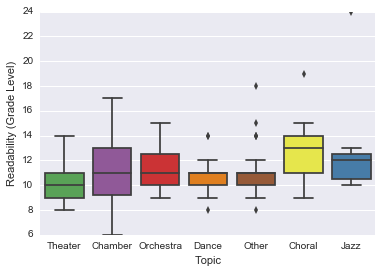

In [103]:
sns.boxplot(np.ravel(descriptions[['topic']]),np.ravel(descriptions[['readability']]),palette=colors)
plt.ylabel('Readability (Grade Level)')
plt.xlabel('Topic')

plt.savefig('readability_boxAndWhisker.png', dpi=300)

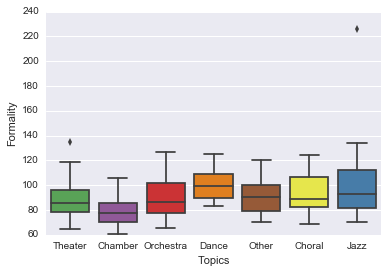

In [105]:
sns.boxplot(np.ravel(descriptions[['topic']]),np.ravel(descriptions[['formality']]),palette=colors)
plt.ylabel('Formality')
plt.xlabel('Topics')

plt.savefig('formality_boxAndWhisker.png', dpi=300)

(0, 40000000)

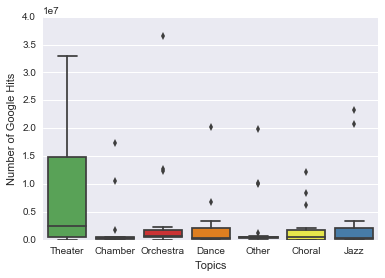

In [19]:
sns.boxplot(np.ravel(descriptions[['topic']]),np.ravel(descriptions[['googleHits']]),palette=colors)
plt.ylabel('Number of Google Hits')
plt.xlabel('Topics')
plt.ylim(0,40000000)

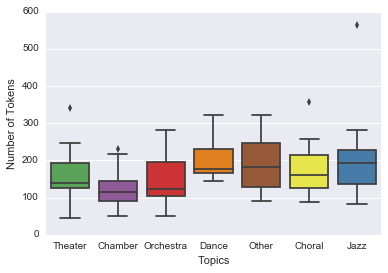

In [110]:
sns.boxplot(np.ravel(descriptions[['topic']]),np.ravel(descriptions[['tokenCount']]),palette=colors)
plt.ylabel('Number of Tokens')
plt.xlabel('Topics')

plt.savefig('tokens_boxAndWhisker.png', dpi=300)

In [21]:
statsData['revenue'] = statsData.tck_amt * statsData.num_seats
statsData = statsData.drop(['UMS_acct_no','acct_created','cust_type','tck_amt','price_type','price_type_group',
                           'mode_of_sale','sales_channel','order_dt','postal_code'],axis=1)

In [22]:
#drop Usher party
statsData.loc[statsData['perf_name'] == 'Usher party']
statsData = statsData.drop([38722,38723,38724,38725,38726])

In [36]:
grouped = statsData.groupby(['perf_name','perf_dt','venue']).sum()
grouped.reset_index(inplace=True)
grouped

,perf_name,perf_dt,venue,num_seats,revenue
0,1927: The Animals an,2013-04-10 19:30:00.000,Performance Network,125,6210.50
1,1927: The Animals an,2013-04-11 19:30:00.000,Performance Network,121,5529.00
2,1927: The Animals an,2013-04-12 20:00:00.000,Performance Network,133,8617.50
3,1927: The Animals an,2013-04-13 14:00:00.000,Performance Network,132,8371.00
4,1927: The Animals an,2013-04-13 20:00:00.000,Performance Network,128,9409.00
5,1927: The Animals an,2013-04-14 14:00:00.000,Performance Network,136,9667.00
6,A Night in Treme,2011-11-11 20:00:00.000,Hill Auditorium,2177,149292.40
7,Ahmad Jamal,2011-09-17 20:00:00.000,Hill Auditorium,1306,86673.30
8,Akademie fur Alte Mu,2014-04-13 16:00:00.000,Hill Auditorium,1059,93540.60
9,Alfredo Rodriguez &,2014-03-14 20:00:00.000,Michigan Theater,631,240714.60


In [37]:
all_descriptions = []
all_longNames = []
all_topics = []
all_readability = []
all_formality = []
all_googleHits = []
all_tokenCounts = []
titles_nowhite = [s.replace(" ", "") for s in titles]
for name in np.ravel(grouped[['perf_name']]):
    n = name.replace(" ","")
    i = titles_nowhite.index(n)
    all_descriptions.append(descs[i])
    all_longNames.append(full_titles[i])
    all_topics.append(topics[i])
    all_readability.append(read[i])
    all_formality.append(formality[i])
    all_googleHits.append(numHits[i])
    all_tokenCounts.append(counts[i])

In [38]:
grouped["description"] = all_descriptions
grouped["full_name"] = all_longNames
grouped["topic"] = all_topics
grouped["readability"] = all_readability
grouped["formality"] = all_formality
grouped["googleHits"] = all_googleHits
grouped["tokenCounts"] = all_tokenCounts

In [26]:
grouped

,perf_name,perf_dt,venue,num_seats,revenue,description,full_name,topic,readability,formality,googleHits,tokenCounts
0,1927: The Animals an,2013-04-10 19:30:00.000,Performance Network,125,6210.50,"A performance that takes film, music, performa...",1927: The Animals and Children Took to the Str...,Other,9,88.5,69500,189
1,1927: The Animals an,2013-04-11 19:30:00.000,Performance Network,121,5529.00,"A performance that takes film, music, performa...",1927: The Animals and Children Took to the Str...,Other,9,88.5,69500,189
2,1927: The Animals an,2013-04-12 20:00:00.000,Performance Network,133,8617.50,"A performance that takes film, music, performa...",1927: The Animals and Children Took to the Str...,Other,9,88.5,69500,189
3,1927: The Animals an,2013-04-13 14:00:00.000,Performance Network,132,8371.00,"A performance that takes film, music, performa...",1927: The Animals and Children Took to the Str...,Other,9,88.5,69500,189
4,1927: The Animals an,2013-04-13 20:00:00.000,Performance Network,128,9409.00,"A performance that takes film, music, performa...",1927: The Animals and Children Took to the Str...,Other,9,88.5,69500,189
5,1927: The Animals an,2013-04-14 14:00:00.000,Performance Network,136,9667.00,"A performance that takes film, music, performa...",1927: The Animals and Children Took to the Str...,Other,9,88.5,69500,189
6,A Night in Treme,2011-11-11 20:00:00.000,Hill Auditorium,2177,149292.40,The Treme (pronounced truh-MAY) neighborhood o...,A Night in Treme,Jazz,11,112.5,890000,218
7,Ahmad Jamal,2011-09-17 20:00:00.000,Hill Auditorium,1306,86673.30,Ahmad Jamal is not just a living legend of jaz...,Ahmad Jamal,Jazz,12,84.0,784000,167
8,Akademie fur Alte Mu,2014-04-13 16:00:00.000,Hill Auditorium,1059,93540.60,The Akademie für Alte Musik Berlin began as a ...,Akademie fur Alte Musik Berlin,Chamber,9,74.0,91600,76
9,Alfredo Rodriguez &,2014-03-14 20:00:00.000,Michigan Theater,631,240714.60,A young pianist of astonishing virtuosity and ...,Alfredo Rodriguez,Jazz,12,89.5,20800000,154


In [39]:
#Features to consider:
#Month of the year
#Some sort of formality score
    #Heylighen & Dewaele:
    #F = (noun frequency + adjective freq. + preposition freq.+
    #article freq. − pronoun freq. − verb freq. − adverb freq. −
    #interjection freq. + 100)/2
#Some sort of readability score
#Structural Diversity Index
#Famousness of show (# of Google hits?)
#Length of description

#Look within the same genre

#Only look within the same sized venue (and/or normalize based on number of seats in the venue)

#Predict: total revenue, total number of tickets sold

In [28]:
count = Counter()
for venue in np.ravel(grouped[['venue']]):
    count[venue] += 1
print(count)

Counter({'Hill Auditorium': 60, 'Power Center': 58, 'Michigan Theater': 33, 'Rackham Auditorium': 23, 'Performance Network': 12, 'Arthur Miller Theatre': 10, 'Corner Brewery': 7, 'St. Francis of Assisi Church': 6, 'Lydia Mendelssohn Theatre': 5, 'General Admission (Education)': 2, 'Dance Club': 2, 'Downtown Home & Garden': 1, 'Music Hall': 1, "St Andrew's Episcopal Church": 1})


In [40]:
venueSeats = {"Arthur Miller Theatre": 225, "Corner Brewery": 120, "Downtown Home & Garden": 600, 
              "Skyline Experimental Theater": 100, "Hill Auditorium": 3536, "Lydia Mendelssohn Theatre": 630,
              "Michigan Theater": 1650, "Performance Network": 140, "Power Center": 1350,
              "Rackham Auditorium": 1060, "St. Francis of Assisi Church": 950, "Trinosophes": 400,
              "St Andrew's Episcopal Church": 525}

In [41]:
#drop ignored locations
grouped.loc[grouped['venue'] == 'Dance Club']
grouped.loc[grouped['venue'] == 'Music Hall']
grouped.loc[grouped['venue'] == 'General Admission (Education)']
grouped = grouped.drop([67,68,85,75,135])

In [42]:
seatPercentages = []
months = []
for i, row in grouped.iterrows():
    months.append(int(row['perf_dt'][5:7]))
    seatPercentages.append(int(row['num_seats'])/venueSeats[row['venue']])
grouped['seatPercentages'] = seatPercentages
grouped['months'] = months

In [85]:
delete = []
for i, row in grouped.iterrows():
    #print(row['perf_dt'][:4])
    if row['perf_dt'][:4] == '2014':
        delete.append(i)
print(delete)

[8, 9, 18, 20, 40, 43, 44, 45, 46, 47, 48, 59, 60, 61, 62, 80, 86, 87, 109, 114, 117, 121, 122, 123, 126, 140, 158, 162, 163, 196, 197, 206, 214, 215, 216, 217]


In [91]:
features = grouped.drop(['num_seats','revenue','description','perf_dt','venue','full_name','topic'],axis=1)
features = features.drop(delete)

In [63]:
descs[24]

'The Akademie für Alte Musik Berlin began as a courageous display of musical sovereignty against the East German socialist regime and now, some 30 years later, enjoys recognition as one of Europe’s greatest musical success stories. “Akademie für Alte Musik Berlin is early music’s Bang on a Can All Stars…staggeringly good players.” (Los Angeles Times) Their UMS debut program features music by J.S. Bach and two of his sons.'

In [55]:
for i in range(len(full_titles)):
    print(i, full_titles[i])

0 The Infernal Comedy
1 Yuja Wang
2 London Philharmonic
3 Hamburg Symphony
4 Chicago Symphony Orchestra
5 San Francisco Symphony
6 Pavel Haas Quartet
7 Ballet Preljocaj
8 Joshua Bell
9 Murray Perahia
10 Mariinsky Orchestra
11 Detroit Symphony Orchestra
12 New York Philharmonic
13 Artemis Quartet
14 Anne-Sophie Mutter,
15 Bobby McFerrin
16 Alison Balsom
17 SITI: Trojan Women
18 Audra McDonald
19 Andras Schiff
20 Apollo's Fire
21 Joshua Bell, violin
22 St Petersburg Philharmonic
23 Israel Philharmonic
24 Akademie fur Alte Musik Berlin
25 Olga Kern
26 Kremerata Baltica
27 Tara Erraught, mezzo
28 Denis Matsuev
29 Handel's Radamisto
30 Milhaud's Oresteian
31 Random Dance
32 Hagen Quartet
33 Handel's Messiah
34 Propeller: Twelfth Night
35 St Lawrence Quartet
36 Belcea Quartet
37 The Audience
38 Gate Theatre
39 Stile Antico
40 Einstein on the Beach
41 Chamber Ensemble of the Shanghai Chinese Orchestra
42 Zakir Hussain & Masters of Percussion
43 Aspen Santa Fe Ballet
44 Rhinoceros
45 Gilberto 

y=-0.003874x^2+0.120670x+-0.229493
(0.2211793166381571, 0.0028469018463698776)


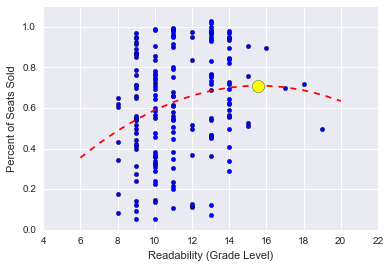

In [150]:
from scipy.stats.stats import pearsonr

x = np.ravel(features[['readability']])
y = np.ravel(features[['seatPercentages']])
plt.scatter(x, y)
plt.xlabel("Readability (Grade Level)")
plt.ylabel("Percent of Seats Sold")
plt.ylim(0,1.1)

xs = [i for i in range(6,21)]
z = np.polyfit(x, y, 2)
p = np.polyval(z,xs)
plt.plot(xs,p,"r--")
print("y=%.6fx^2+%.6fx+%.6f"%(z[0],z[1],z[2]))
print(pearsonr(x,y))

plt.scatter([15.57],[0.710],c='yellow',s=[150],zorder=10)

plt.savefig('readability_correlation.png', dpi=300)

y=-0.000211x+(0.640747)
(-0.015326918663140799, 0.83818814509449213)


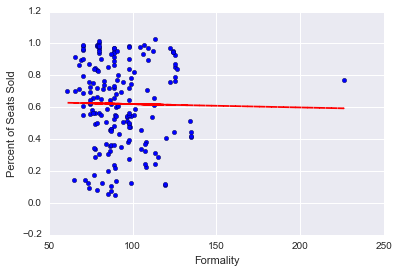

In [93]:
x = np.ravel(features[['formality']])
y = np.ravel(features[['seatPercentages']])
plt.scatter(x, y)
plt.xlabel("Formality")
plt.ylabel("Percent of Seats Sold")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
print(pearsonr(x,y))

y=-0.000000x+(0.579261)
(-0.13250173083510763, 0.051816751653777977)


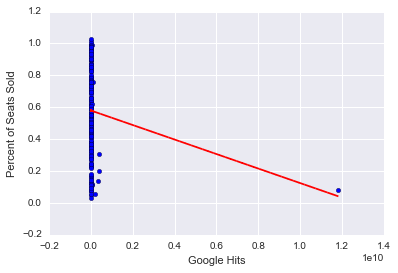

In [89]:
x = np.ravel(features[['googleHits']])
y = np.ravel(features[['seatPercentages']])
plt.scatter(x, y)
plt.xlabel("Google Hits")
plt.ylabel("Percent of Seats Sold")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
print(pearsonr(x,y))

y=-0.000023x+(0.625149)
(-0.006398437256042654, 0.93206513539437386)


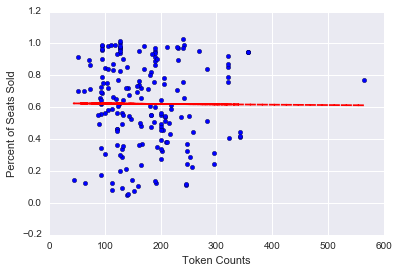

In [94]:
x = np.ravel(features[['tokenCounts']])
y = np.ravel(features[['seatPercentages']])
plt.scatter(x, y)
plt.xlabel("Token Counts")
plt.ylabel("Percent of Seats Sold")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
print(pearsonr(x,y))

In [111]:
shuffledTitles = copy.copy(titles)
random.shuffle(shuffledTitles)

In [112]:
trainData = features.loc[features['perf_name'].isin(shuffledTitles[:100])]
testData = features.loc[features['perf_name'].isin(shuffledTitles[100:])]
trainData = trainData.drop('perf_name',axis=1)
testData = testData.drop('perf_name',axis=1)

In [113]:
trainTarget = np.ravel(trainData[['seatPercentages']])
trainData = trainData.drop('seatPercentages',axis=1)

In [114]:
trainDataMat = trainData.as_matrix()

In [115]:
testTarget = np.ravel(testData[['seatPercentages']])
testData = testData.drop('seatPercentages',axis=1)
testDataMat = testData.as_matrix()

In [116]:
#bin target data
bins = np.linspace(0, 1, 10)
trainTarget = np.digitize(trainTarget,bins)
testTarget = np.digitize(testTarget,bins)

In [117]:
from scipy import stats
stats.mode(trainTarget)
print(25/len(trainTarget))

0.20161290322580644


In [118]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(trainDataMat,trainTarget)
print(clf.score(trainDataMat,trainTarget))
print(clf.score(testDataMat,testTarget))

0.116864915668
-0.0606637483958


In [119]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(trainDataMat,trainTarget)
print(clf.score(trainDataMat,trainTarget))
print(clf.score(testDataMat,testTarget))

0.814516129032
0.0909090909091


In [120]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(trainDataMat,trainTarget)
print(clf.score(trainDataMat,trainTarget))
print(clf.score(testDataMat,testTarget))

0.467741935484
0.109090909091


In [121]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(trainDataMat,trainTarget)
print(clf.score(trainDataMat,trainTarget))
print(clf.score(testDataMat,testTarget))

0.0564516129032
0.0181818181818


In [338]:
trainData

,readability,formality,googleHits,tokenCounts,months
0,9,88.5,69500,189,4
1,9,88.5,69500,189,4
2,9,88.5,69500,189,4
3,9,88.5,69500,189,4
4,9,88.5,69500,189,4
5,9,88.5,69500,189,4
6,11,112.5,890000,218,11
7,12,84.0,784000,167,9
10,13,70.5,373000,94,4
11,8,92.0,470000,217,2


In [363]:
#bin data
bins = np.linspace(9, 19, 4)
read_binned = np.digitize(np.ravel(trainData[['readability']]),bins)

bins = np.linspace(64,134.5,9)
form_binned = np.digitize(np.ravel(trainData[['formality']]),bins)

bins = np.linspace(5220,391000000,2)
google_binned = np.digitize(np.ravel(trainData[['googleHits']]),bins)

bins = np.linspace(1,12,6)
months_binned = np.digitize(np.ravel(trainData[['months']]),bins)

binnedData = copy.copy(trainData)
binnedData['readability'] = read_binned
binnedData['formality'] = form_binned
binnedData['googleHits'] = google_binned
binnedData['months'] = months_binned

In [364]:
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(binnedData, n_iter=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(binnedData, trainTarget)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of labels for any class cannot be less than 2.

In [277]:
trainDataMat

array([[  7.89600000e+03,   5.52720000e+04,   5.15872000e+08,
          1.09886000e+05,   9.00000000e+00],
       [  5.36400000e+03,   4.41040000e+04,   5.45936000e+07,
          4.52960000e+04,   4.00000000e+00],
       [  3.14400000e+03,   2.34490000e+04,   5.44960000e+09,
          4.03480000e+04,   3.00000000e+00],
       [  1.58600000e+04,   8.60100000e+04,   4.55060000e+08,
          1.14680000e+05,   4.00000000e+00],
       [  2.52000000e+03,   2.89800000e+04,   1.80432000e+08,
          6.35040000e+04,   1.10000000e+01],
       [  2.39360000e+04,   9.22240000e+04,   4.75904000e+08,
          7.18080000e+04,   1.00000000e+01],
       [  5.40000000e+03,   4.67100000e+04,   2.51640000e+08,
          1.09080000e+05,   2.00000000e+00],
       [  3.69000000e+03,   3.13650000e+04,   1.20540000e+08,
          3.73100000e+04,   3.00000000e+00],
       [  1.42000000e+03,   1.16440000e+04,   8.37800000e+07,
          1.87440000e+04,   3.00000000e+00],
       [  5.23600000e+03,   4.2126000